In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_pickle(r'D:\Projects\Cafe db\filtered_data')

In [5]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483020 entries, 0 to 483043
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483020 non-null  int64         
 1   num_check      483020 non-null  int64         
 2   datetime       483020 non-null  datetime64[ns]
 3   time_eat       483020 non-null  object        
 4   smena          483020 non-null  int64         
 5   good           483020 non-null  object        
 6   total_chek     483020 non-null  float64       
 7   price          483020 non-null  float64       
 8   pr_bez_nds     483020 non-null  float64       
 9   avg_price      483020 non-null  float64       
 10  profit         483020 non-null  float64       
 11  amount         483020 non-null  float64       
 12  position_good  483020 non-null  int64         
 13  summa          483020 non-null  float64       
 14  payment        483020 non-null  object        
 15  check

**Общие продажи**

In [7]:
revenue_by_seasons = df.groupby('seasons')['revenue'].sum().reset_index()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17120\1463252941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_seasons = df.groupby('seasons')['revenue'].sum().reset_index()


In [8]:
revenue_by_seasons

,seasons,revenue
0,Весна,"10,249,678.81"
1,Зима,"6,220,926.16"
2,Лето,"9,387,930.10"
3,Осень,"7,788,391.67"


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17120\1410262580.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


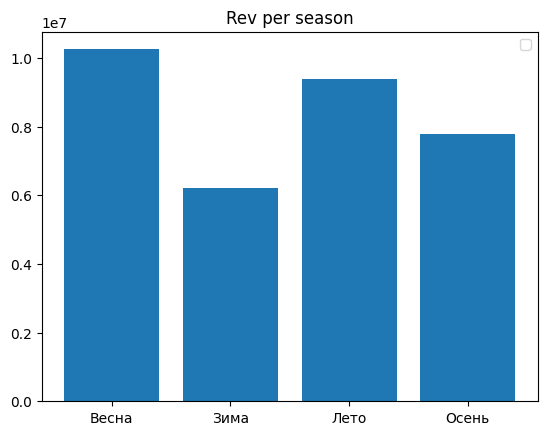

In [9]:
plt.bar(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'])
plt.title('Rev per season')
plt.legend()

Text(0.5, 1.0, 'Rev per season')

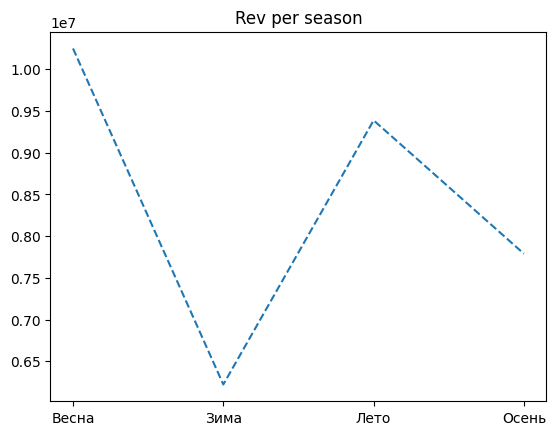

In [10]:
plt.plot(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'], '--')
plt.title('Rev per season')

Text(0.5, 1.0, 'Rev per season')

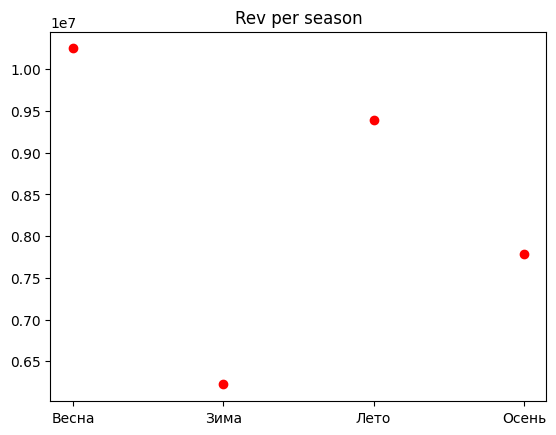

In [11]:
plt.plot(revenue_by_seasons['seasons'], revenue_by_seasons['revenue'], 'ro')
plt.title('Rev per season')

In [17]:
revenue_by_day = df.groupby('day')['revenue'].sum().reset_index()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17120\2804614415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_day = df.groupby('day')['revenue'].sum().reset_index()


In [19]:
revenue_by_day[revenue_by_day['revenue'] > 0]

,day,revenue
0,Понедельник,"6,461,695.87"
1,Вторник,"6,960,048.16"
2,Среда,"6,874,605.80"
3,Четверг,"7,217,355.03"
4,Пятница,"5,994,862.40"
5,Суббота,"138,359.48"


In [14]:
revenue_by_group = df.groupby('group')['revenue'].sum().reset_index()

In [15]:
revenue_by_group.sort_values(by='revenue', ascending=False)

,group,revenue
8,Основное блюдо,"13,882,885.54"
11,Салат,"4,297,947.21"
14,Супы Горячие,"2,956,153.54"
3,Гарнир,"2,857,077.46"
7,Напитки,"2,584,406.21"
5,Завтрак,"1,586,977.91"
2,Выпечка и десерт,"1,480,207.64"
1,Выпечка,"1,031,934.03"
0,Бутерброд,"878,893.98"
4,Десерты,"714,468.59"


In [16]:
df['group'].unique()

array(['Завтрак', 'Основное блюдо', 'Хлеб', 'Напитки', 'Контейнер',
       'Выпечка и десерт', 'Бутерброд', 'Выпечка', 'Соус', 'Салат',
       'Снеки', 'Фрукты', 'Гарнир', 'Супы Горячие', 'Десерты', 'Приборы',
       'Торт цельный', 'Пирог цельный', 'Супы холодные'], dtype=object)